# Learning XOR with Tensorflow

## Imports

In [1]:
import os
import sys

import numpy as np
np.random.seed(123)  # for reproducibility
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

/Users/Kevin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# set LOG_DIR based on this file's name ()
LOG_DIR=os.path.abspath('./TB_XOR_Tensorflow')
print('Logging to dir: {}'.format(LOG_DIR))

Logging to dir: /Users/Kevin/Documents/Projekte/tensorflow/DeepStuff/DeepXOR/TB_XOR_Tensorflow


## Input Data and Labels

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

## Define the Linear Model

In [4]:
def linearModel():
  """ A poor linear model for XOR """
  # other params
  batch_size = 4
  num_labels = 2

  graph = tf.Graph()
  with graph.as_default():
    # create placeholders
    _X = tf.placeholder(tf.float32, shape=(batch_size, num_labels), name='x-input')
    _y = tf.placeholder(tf.float32, shape=(batch_size, 1), name='y-input')

    # create model params
    weights = tf.Variable(tf.random_uniform([num_labels, 1], -1, 1), name="weights")
    bias = tf.Variable(tf.zeros([1]), name="bias")
    output = tf.add(tf.matmul(_X, weights), bias, name='output')
    loss = tf.losses.mean_squared_error(labels=_y, predictions=output)

    # # RMSProp Optimizer
    learning_rate = tf.constant(0.01, name='learning_rate')
    optimizer = tf.train.RMSPropOptimizer(learning_rate, name='optimizer').minimize(loss)
  return graph, _X, _y, output, loss, learning_rate, optimizer

In [5]:
def run_model(model_fn, num_steps=1001):
  losses = []
  # create model and get required operations / tensors
  graph, _X, _y, output, loss, learning_rate, optimizer = model_fn()
  # write graph events to disk for using tensorboard
  tf.summary.FileWriter(logdir=LOG_DIR, graph=graph)
  # run session
  with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    for step in np.arange(num_steps):
        # feed the net with our inputs and desired outputs.
        feed_dict = {_X: X, _y: y }
        _, lr, l, out = sess.run([optimizer, learning_rate, loss, output], feed_dict=feed_dict)
        losses.append(l)
        if step % (num_steps // 10) == 0:
          print('Loss at step {}: {}'.format(step, l))
    print('Final output: \n{}'.format(out))
  return losses

### Run Session (and 'timeit')

In [7]:
%timeit run_model(linearModel, num_steps=1001)

Loss at step 0: 0.517726480960846
Loss at step 100: 0.25005292892456055
Loss at step 200: 0.25010615587234497
Loss at step 300: 0.25011253356933594
Loss at step 400: 0.25011247396469116
Loss at step 500: 0.25011247396469116
Loss at step 600: 0.25011247396469116
Loss at step 700: 0.25011247396469116
Loss at step 800: 0.25011247396469116
Loss at step 900: 0.25011247396469116
Loss at step 1000: 0.25011247396469116
Final output: 
[[0.495]
 [0.49 ]
 [0.49 ]
 [0.485]]
Loss at step 0: 0.6839936971664429
Loss at step 100: 0.25000861287117004
Loss at step 200: 0.2501055598258972
Loss at step 300: 0.25011250376701355
Loss at step 400: 0.25011250376701355
Loss at step 500: 0.25011250376701355
Loss at step 600: 0.25011250376701355
Loss at step 700: 0.25011250376701355
Loss at step 800: 0.25011250376701355
Loss at step 900: 0.25011250376701355
Loss at step 1000: 0.25011250376701355
Final output: 
[[0.505]
 [0.51 ]
 [0.51 ]
 [0.515]]
Loss at step 0: 0.5149340033531189
Loss at step 100: 0.25195810198

In [8]:
def plot_losses(losses):
  plt.figure()
  plt.plot(losses)
  plt.grid()
  plt.legend(['Losses'])
  plt.show()

Loss at step 0: 0.5404296517372131
Loss at step 100: 0.2504018247127533
Loss at step 200: 0.2501070499420166
Loss at step 300: 0.25011247396469116
Loss at step 400: 0.25011247396469116
Loss at step 500: 0.25011250376701355
Loss at step 600: 0.25011250376701355
Loss at step 700: 0.25011250376701355
Loss at step 800: 0.25011250376701355
Loss at step 900: 0.25011250376701355
Loss at step 1000: 0.25011250376701355
Final output: 
[[0.505]
 [0.51 ]
 [0.51 ]
 [0.515]]


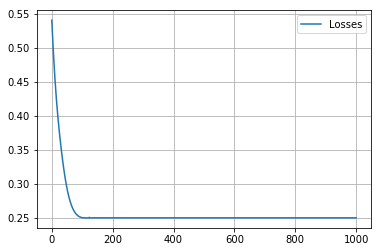

In [10]:
# run again, this time without timing
losses = run_model(linearModel, 1001)
plot_losses(losses)

## Define the Two-Layer Model

In [11]:
def layeredModel():
  """ A better model for XOR """
  # other params
  batch_size = 4
  num_labels = 2

  graph = tf.Graph()
  with graph.as_default():
    # create placeholders
    with tf.name_scope('inputs'):
      _X = tf.placeholder(tf.float32, shape=(batch_size, num_labels), name='X')
      _y = tf.placeholder(tf.float32, shape=(batch_size, 1), name='y')

    # create model params
    with tf.name_scope('hidden'):
      hidden1 = tf.layers.dense(_X, 2, activation=tf.nn.relu, kernel_initializer=tf.random_uniform_initializer, name='hidden1')
    with tf.name_scope('output'):
      output = tf.layers.dense(hidden1, 1, activation=tf.sigmoid, kernel_initializer=tf.random_uniform_initializer, name='output')
    with tf.name_scope('loss'):
      loss = tf.losses.mean_squared_error(labels=_y, predictions=output)

    # RMSProp Optimizer
    learning_rate = tf.constant(0.01, name='learning_rate')
    with tf.name_scope('optimizer'):
      optimizer = tf.train.RMSPropOptimizer(learning_rate, name='optimizer').minimize(loss)
  return graph, _X, _y, output, loss, learning_rate, optimizer

Loss at step 0: 0.27821657061576843
Loss at step 100: 0.251031756401062
Loss at step 200: 0.20138375461101532
Loss at step 300: 0.11820860952138901
Loss at step 400: 0.04835834726691246
Loss at step 500: 0.014605778269469738
Loss at step 600: 0.0033741891384124756
Loss at step 700: 0.0006511649116873741
Loss at step 800: 0.0001164744608104229
Loss at step 900: 2.001344364543911e-05
Loss at step 1000: 5.0788580665539484e-06
Final output: 
[[0.00373488]
 [0.99852484]
 [0.99852484]
 [0.00141913]]


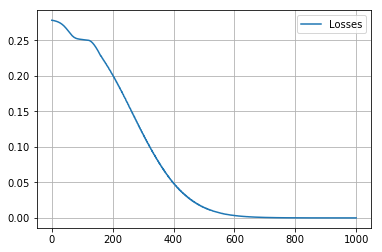

In [12]:
losses = run_model(layeredModel, 1001)
plot_losses(losses)